<a href="https://colab.research.google.com/github/raul-arrabales/TextAnalytics/blob/master/intro_nltk_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al uso de NLTK**

Versión adaptada para Google Colab


## Configuración y descarga de NLTK

In [28]:
# Importamos la biblioteca NLTK
# Info: https://www.nltk.org/ 
import nltk

In [29]:
# NLTK contiene múltiples recursos, como corpora y modelos. 
# Con la función download elegimos qué queremos descargar. 
# En este caso, nos basta con la colección del libro ("book")
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d book
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /root/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package conll2000 to /root/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /root/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Unzipping corpora/dependency_treebank.zip.
       

True

## "Hola Mundo" con NLTK

In [30]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [31]:
# En la variable envoltorio text1 tenemos el libro Moby Dick
text1

<Text: Moby Dick by Herman Melville 1851>

In [32]:
# Se trata de una estructura de datos propia de NLTK:
type(text1)

nltk.text.Text

In [33]:
# Podemos observar por ejemplo la concordancia de palabras
# y observar las ocurrencias en su contexto:
text1.concordance('cannibal')

Displaying 19 of 19 matches:
azed , and wondered what monstrous cannibal and savage could ever have gone a 
e holy Sabbath , engaged in such a cannibal business as selling the heads of d
t was extinguished , and this wild cannibal , tomahawk between his teeth , spr
 , I kill - e !" again growled the cannibal , while his horrid flourishings of
hat that infernal harpooneer was a cannibal ?" " I thought ye know ' d it ;-- 
the whole a clean , comely looking cannibal . What ' s all this fuss I have be
of him . Better sleep with a sober cannibal than a drunken Christian . " Landl
ge house in the broad day , with a cannibal and a tomahawk ! " Queequeg !-- in
h sadly vitiated , I fear , by the cannibal propensity he nourished in his unt
tain , " I ' ll kill - e YOU , you cannibal , if you try any more of your tric
 . She was a thing of trophies . A cannibal of a craft , tricking herself fort
 had not suspected my friend was a cannibal , and furthermore announcing that 
that sight take a tooth

In [34]:
# Elegimos el ancho del contexto (60 caracteres) y el número de coincidencias (10)
text1.concordance('kill', 60, 10)

Displaying 10 of 33 matches:
ry whether I can master and kill this Sperma - ceti whale , 
 years ago did Nathan Swain kill fifteen whales between a su
no speak - e , dam - me , I kill - e ." And so saying the li
o - ee be , or dam - me , I kill - e !" again growled the ca
slowly as possible so as to kill time , and with a bitter si
id I , " that you came near kill - e that man there ," point
ill shivering greenhorn . " Kill - e ," cried Queequeg , twi
 - e fish - e ; Queequeg no kill - e so small - e fish - e ;
all - e fish - e ; Queequeg kill - e big whale !" " Look you
ared the Captain , " I ' ll kill - e YOU , you cannibal , if


## Ejemplo de análisis del texto de Don Quijote

### Cargar el fichero con el texto

In [35]:
# Para cargar directamente el texto desde su URL en Internet
import urllib
# import gzip
# import zipfile

In [36]:
# Don Quijote en texto plano de la biblioteca Gutenberg
URL_quijote = "http://www.gutenberg.org/cache/epub/2000/pg2000.txt"

In [37]:
# Descargar el texto plano de Don Quijote:
response = urllib.urlopen(URL_quijote)
quijotext_zipped = response.read()

In [128]:
# The txt is actually downloaded as a zipped utf8 encoded text file:
# A web server thing... 
quijotext_zipped[0:100]

"\x1f\x8b\x08\x08\xa3\t\xef_\x02\xffpg2000.txt.utf8.gzip\x00\x94\xbd\xcb\x8e\x1cY\x96-6'\xc0\x7f\xb0\xbc\x1a\xd4\xed\x863\xd0\xdd\x10$4c\x90\x08>2\x93u\x99I\x16\xc9L([\xd0\xe0\xb8\x9b\x85\x87\x85\xcc\xedx\x99\xb9E\x95\xc7\xac\x87wp\x07\x82\xbe\x80CB\xe0\xa0\x90\xb3l\x01"

In [39]:
# Descargo el zip a local como texto...
# https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url 
import requests 

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [40]:
# Mi texto de Don Quijote en local
URI_quijote = "quijote_local.txt"

In [56]:
# Leo el texto completo (decodificando UTF-8)
import io
download_url(URL_quijote, URI_quijote)
with io.open(URI_quijote, encoding="utf-8") as f:
    Quijote_lines = f.readlines()

In [82]:
Quijote_unicode = urllib.urlopen(URI_quijote).read().decode('utf8')

In [83]:
type(Quijote_unicode)

unicode

In [75]:
# Comprobar decodificación:
Quijote_lines[1200:1220]

[u'servicios y mercedes.\n',
 u'\n',
 u'Hechas, pues, de galope y aprisa las hasta all\xed nunca vistas ceremonias, no\n',
 u'vio la hora don Quijote de verse a caballo y salir buscando las aventuras;\n',
 u'y, ensillando luego a Rocinante, subi\xf3 en \xe9l, y, abrazando a su hu\xe9sped, le\n',
 u'dijo cosas tan estra\xf1as, agradeci\xe9ndole la merced de haberle armado\n',
 u'caballero, que no es posible acertar a referirlas. El ventero, por verle ya\n',
 u'fuera de la venta, con no menos ret\xf3ricas, aunque con m\xe1s breves palabras,\n',
 u'respondi\xf3 a las suyas, y, sin pedirle la costa de la posada, le dej\xf3 ir a\n',
 u'la buen hora.\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'\n',
 u'Cap\xedtulo IV. De lo que le sucedi\xf3 a nuestro caballero cuando sali\xf3 de la\n',
 u'venta\n',
 u'\n',
 u'\n',
 u'La del alba ser\xeda cuando don Quijote sali\xf3 de la venta, tan contento, tan\n']

In [57]:
print("Don Quijote tiene " + str(len(Quijote_lines)) + " líneas.")

Don Quijote tiene 37861 líneas.


In [58]:
# Inspeccionar una línea
Quijote_lines[3450]

u'querida y servida de un tal caballero como vuestra merced parece.\n'

In [59]:
# Tengo una lista de líneas
type(Quijote_lines)

list

In [60]:
# Construyo una única cadena
Quijote_words = ''.join(Quijote_lines)

In [61]:
print("Don Quijote tiene " + str(len(Quijote_words)) + " caracteres.")

Don Quijote tiene 2117507 caracteres.


In [63]:
# Uso el tokenizador de NLTK
Quijote_tokens = nltk.word_tokenize(Quijote_words, language='spanish')

In [64]:
type(Quijote_tokens)

list

In [66]:
print("Don Quijote tiene " + str(len(Quijote_tokens)) + " palabras.")

Don Quijote tiene 442210 líneas.


In [71]:
# Una palabra del Quijote
Quijote_tokens[24359]

u'ayudarme'

In [74]:
Quijote_tokens[1300:1320]

[u'y',
 u'nunca',
 u'imaginados',
 u'de',
 u'otro',
 u'alguno',
 u',',
 u'bien',
 u'como',
 u'quien',
 u'se',
 u'engendr\xf3',
 u'en',
 u'una',
 u'c\xe1rcel',
 u',',
 u'donde',
 u'toda',
 u'incomodidad',
 u'tiene']

### Convertir a formato NLTK

In [87]:
Quijote_text = nltk.Text(Quijote_tokens)

In [88]:
type(Quijote_text)

nltk.text.Text

In [90]:
len(Quijote_text)

442210

In [94]:
Quijote_text[1200:1210]

[u'que',
 u'no',
 u'desde\xf1ar\xe1',
 u'la',
 u'cortedad',
 u'de',
 u'tan',
 u'humilde',
 u'servicio',
 u'.']

### Analizar el texto de Don Quijote

In [96]:
# Concordancia
Quijote_text.concordance("asno")

Displaying 25 of 88 matches:
 mal criado , pues vuestra lengua de asno al amo ultraja . R. Asno se es de la
a lengua de asno al amo ultraja . R. Asno se es de la cuna a la mortaja . ¿Que
omó de la rienda , y del cabestro al asno , y se encaminó hacia su pueblo , bi
 , y que ansimesmo pensaba llevar un asno que tenía muy bueno , porque él no e
echo a andar mucho a pie . En lo del asno reparó un poco don Quijote , imagina
 socorrerle , a todo el correr de su asno , y cuando llegó halló que no se pod
fraile , apeándose ligeramente de su asno , arremetió a él y le comenzó a quit
 Panza , que tenía del cabestro a su asno , a los pies del cual estaba otro ré
obre Rocinante ; y él subió sobre su asno y comenzó a seguir a su señor , que 
cer , caballero sobre un muy hermoso asno . -Verdad será que él debía de ir ca
; y con todo este trabajo aparejó su asno , que también había andado algo dest
ancho acomodó a don Quijote sobre el asno y puso de reata a Rocinante ; y , ll
 reata a Rocinante ; y 

In [98]:
# Contextos similares
Quijote_text.similar("asno")

escudero señor padre amo camino alma lugar caballo corazón nombre
hombre mundo cuerpo caballero cura castillo cielo brazo gobierno
jumento


In [99]:
# Contextos comunnes para un conjunto de palabras
Quijote_text.common_contexts(["asno", "doncella"])

mi_que su_y


In [100]:
Quijote_text.common_contexts(["asno", "caballo"])

el_y mi_que al_y del_y del_del su_y mi_y un_y un_rucio su_a el_no
el_de del_abajo al_de


In [101]:
Quijote_text.common_contexts(["asno", "caballo", "perro"])

el_y mi_y


In [102]:
Quijote_text.common_contexts(["gato", "caballo", "perro"])

el_y un_de


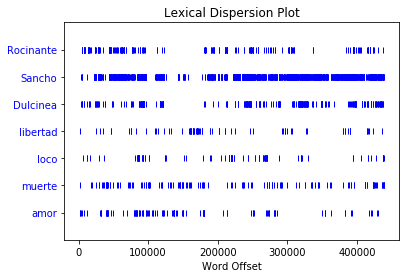

In [103]:
# Localización de palabras en el texto
Quijote_text.dispersion_plot(["Rocinante","Sancho","Dulcinea","libertad","loco","muerte","amor"])

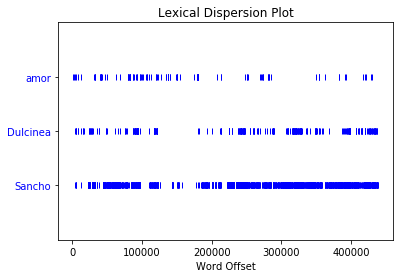

In [104]:
Quijote_text.dispersion_plot(["amor","Dulcinea", "Sancho"])

### Métricas

In [105]:
# Número de tokens
len(Quijote_text)

442210

In [106]:
# Tokens ordenados y eliminados duplicados
ordered_tkns = sorted(set(Quijote_text))

In [107]:
ordered_tkns[324:329]

[u'-Gracias', u'-Grande', u'-Gurapas', u'-Ha', u'-Habla']

In [108]:
# Número de tokens únicos
len(ordered_tkns)

26293

In [111]:
# Riqueza del texto

from __future__ import division
len(ordered_tkns) / len(Quijote_text)

0.05945817597973813

In [112]:
Quijote_text.count("Sancho") / Quijote_text.count("Dulcinea")

5.859205776173285

In [113]:
Quijote_text.count("Sancho") / len(Quijote_text)

0.0036702019402546303

In [114]:
Quijote_text.count("Dulcinea") / len(Quijote_text)

0.0006263992220890527

In [115]:
Quijote_text.count("que") / len(Quijote_text)

0.04640329255331178

### Distribución de frecuencias

In [116]:
fdQuijote = FreqDist(Quijote_text)

In [117]:
fdQuijote.most_common(10)

[(u',', 40320),
 (u'que', 20520),
 (u'de', 17992),
 (u'y', 17155),
 (u'la', 10201),
 (u'a', 9580),
 (u'.', 8094),
 (u'el', 7960),
 (u'en', 7900),
 (u'no', 5766)]

In [118]:
fdQuijote['Sancho']

1623

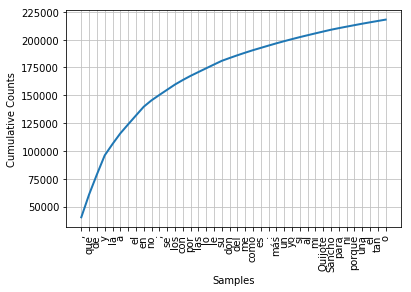

In [119]:
fdQuijote.plot(40, cumulative=True)

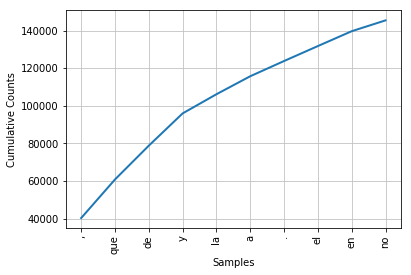

In [120]:
fdQuijote.plot(10, cumulative=True)

### Selección de palabras

In [121]:
# Palabras que sólo aparecen una vez
rareWords = fdQuijote.hapaxes()

In [122]:
rareWords[1:10]

[u'\xbfventa',
 u'acurruc\xf3',
 u't\xeda',
 u'-Pintad',
 u'gastara',
 u'Jerusal\xe9n',
 u'llanas',
 u'receiving',
 u'arrastradas']

In [123]:
# Palabras largas
long_words = [w for w in ordered_tkns if len(w) > 17]
sorted(long_words)

[u'//gutenberg.org/license',
 u'//pglaf.org/donate',
 u'//pglaf.org/fundraising',
 u'//www.gutenberg.org',
 u'//www.gutenberg.org/2/0/0/2000/',
 u'asombrado.Pregunt\xf3',
 u'bienintencionadamente',
 u'correspondi\xe9ndoles',
 u'desembarazadamente',
 u'estraordinariamente',
 u'extraordinariamente',
 u'trademark/copyright',
 u'\xa1Desagradecimiento']

In [124]:
# Palabras más largas de 8 caracteres que aparecen más de 100 veces
sorted(w for w in ordered_tkns if len(w) > 8 and fdQuijote[w] > 100)

[u'-respondi\xf3',
 u'Rocinante',
 u'caballero',
 u'caballeros',
 u'caballer\xeda',
 u'gobernador',
 u'hermosura',
 u'intenci\xf3n',
 u'pensamientos',
 u'respondi\xf3']

In [126]:
# bigramas
Quijote_text.collocations()

vuestra merced; Sancho Panza; -respondió Sancho-; vuesa merced;
caballeros andantes; -dijo Sancho-; los ojos; todos los; del Toboso;
otra cosa; caballero andante; sin duda; las manos; todas las; Project
Gutenberg-tm; muchas veces; señora Dulcinea; cada uno; Triste Figura;
los dos
